<a href="https://colab.research.google.com/github/hirajya/CCMACLRL_EXERCISES_COM222/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [58]:
df = pd.read_excel('friends_info.xlsx')
df.head()

,name,posts_frequently,active_in_social_media,replies_to_comments,number_of_followers,personality
0,justmrll_,0,1,1,468,1
1,pran.sue,0,0,1,57,0
2,ryuly_urs_,1,1,0,41,0
3,bin._.cy,1,1,1,27,1
4,dvh.n1,0,1,1,262,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    50 non-null     object
 1   posts_frequently        50 non-null     int64 
 2   active_in_social_media  50 non-null     int64 
 3   replies_to_comments     50 non-null     int64 
 4   number_of_followers     50 non-null     int64 
 5   personality             50 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


In [60]:
df.columns

Index(['name', 'posts_frequently', 'active_in_social_media',
       'replies_to_comments', 'number_of_followers', 'personality'],
      dtype='object')

In [61]:
df.isnull().sum()

,0
name,0
posts_frequently,0
active_in_social_media,0
replies_to_comments,0
number_of_followers,0
personality,0


In [62]:
personality_counts = df['personality'].value_counts()
print(personality_counts)


personality
1    28
0    22
Name: count, dtype: int64


In [63]:
df.shape

(50, 6)

In [64]:
for column in df.columns[1:]:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()


Unique values in column 'posts_frequently':
[0 1]

Unique values in column 'active_in_social_media':
[1 0]

Unique values in column 'replies_to_comments':
[1 0]

Unique values in column 'number_of_followers':
[ 468   57   41   27  262  250  195  327  225  575 2855   91  335  196
   66  148  587  245  281  432   76  240  382 1022  374  384  228  292
  481  523  102  866  446  452  146  618  887  197  612  209  331  110
  251   73  552   40  598  214]

Unique values in column 'personality':
[1 0]



In [65]:
# prompt: remove column named "name" from df

df_cleaned = df.drop('name', axis=1)
df_cleaned.head()

,posts_frequently,active_in_social_media,replies_to_comments,number_of_followers,personality
0,0,1,1,468,1
1,0,0,1,57,0
2,1,1,0,41,0
3,1,1,1,27,1
4,0,1,1,262,0


# Split the dataset into training and test set

In [66]:
X = df_cleaned.iloc[:, :-1]
y = df_cleaned.iloc[:, -1]

print(X.shape, y.shape)


(50, 4) (50,)


In [67]:
X.head()

,posts_frequently,active_in_social_media,replies_to_comments,number_of_followers
0,0,1,1,468
1,0,0,1,57
2,1,1,0,41
3,1,1,1,27
4,0,1,1,262


In [68]:
y.head()

,personality
0,1
1,0
2,0
3,1
4,0


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35, 4)
(15, 4)
(35,)
(15,)


# Create the model

In [70]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [71]:
knn.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0])

# Evaluate the model

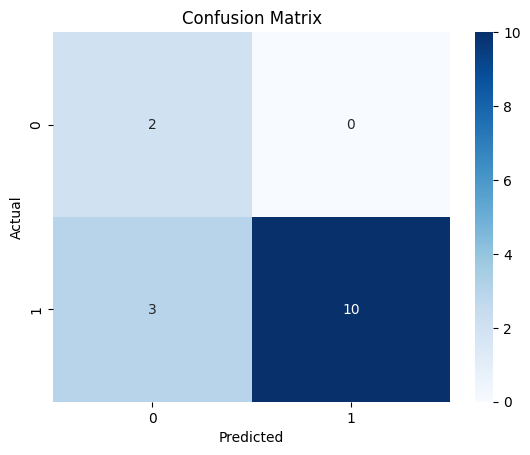

In [72]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [73]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       1.00      0.77      0.87        13

    accuracy                           0.80        15
   macro avg       0.70      0.88      0.72        15
weighted avg       0.92      0.80      0.83        15

